In [223]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [224]:
yolo=cv2.dnn.readNet("./yolov3.weights","./yolov3.cfg")

In [225]:
classes=[]
with open("./coco.names",'r') as f:
    classes= f.read().splitlines()

   

In [226]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [227]:
img=cv2.imread(".\jerrylodu.jpg")

blob=cv2.dnn.blobFromImage(img,1/255,(320,320), (0,0,0),swapRB=True,crop=False)

In [228]:
fWidth = 320
fHeight = 320
 
# Resize image in opencv
img = cv2.resize(img, (fWidth, fHeight))
 
height, width, channels = img.shape

In [229]:
blob.shape

(1, 3, 320, 320)

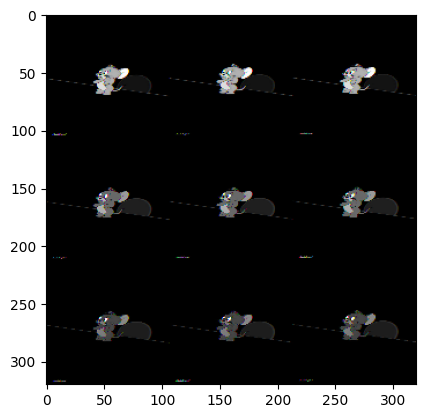

In [230]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [231]:
yolo.setInput(blob)

In [232]:
output_layer_name=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layer_name)
print(layeroutput[0].shape)
print(layeroutput[1].shape)
print(layeroutput[2].shape)

(300, 85)
(1200, 85)
(4800, 85)


In [233]:
width=320
height=320

In [234]:
boxs=[]
confidences=[]
class_ids=[]
for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.5:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[0]*width)
            h=int(detection[0]*height)
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            boxs.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [235]:
len(boxs)

1

In [236]:
indexes=cv2.dnn.NMSBoxes(boxs,confidences,0.5,0.4)

In [237]:
font=cv2.FONT_HERSHEY_DUPLEX
colors=np.random.uniform(0,255,size=(len(boxs),3))

In [238]:
for i in range(len(boxs)):
    if i in indexes:
        x, y, w, h = boxs[i]
        label = str(classes[class_ids[i]])
        confidence_label = int(confidences[i] * 100)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.putText(img, f'{label, confidence_label}', (x-25, y + 75), font, 1, color, 1)

for i in indexes.flatten():
    x,y,w,h=boxs[i]
    label=str(classes[class_ids[i]])
    confi=str(round(confidences[i],2))
    color=colors[i]

    cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
    cv2.putText(img,label +" "+confi,(x,y+20),font,2,(255,255,255),1)

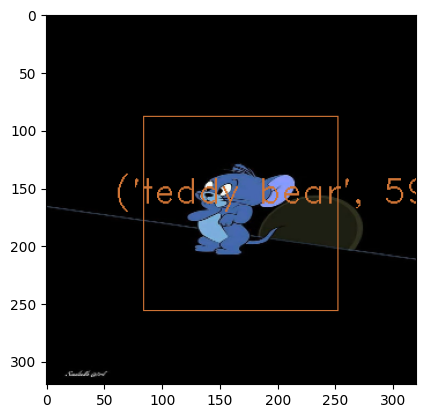

In [239]:
plt.imshow(img)

cv2.destroyAllWindows()